# Orlando Criminal Activities

##### Presented by: Clark Jones, Umapathy Beema, Richard Morand <br> Dr. Spencer Lyon - Spring 2024 


Ojective: We will be exploring the criminal acts in Orlando, and create a model to showcase the types of activities done in the city. <br>

__Tools__ <br>
Collaboration: VSCode, Github, Discord <br>
Languages: Python, Julia
Packages/Libraries: Agents, OpenStreetMap, Pandas, etc.

In [1]:
#import packages here
import Pkg
Pkg.add(["OpenStreetMapX","CSV", "DataFrames"])

    Updating registry at `C:\Users\umapa\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\umapa\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\umapa\.julia\environments\v1.10\Manifest.toml`


In [2]:
using Agents, OpenStreetMapX
using  CSV, DataFrames

In [3]:
# load and analyze data
data = CSV.read("Data/OPD_Officer-Involved_Shootings_20241125.csv", DataFrame)

Row,Case #,Date,Address,Incident Type,Number of Officers Involved,Officer Name,Officer Race,Ethnicity,Officer Gender,Officer Age,Officer Tenure,Number of Suspects Involved,Suspect Name,Suspect Race,Suspect Gender,Suspect Age,Suspect's Weapon,Suspect Hit,Fatal,Officer Hit,Fatal (Officer),Review Letter,Georeferenced Column
,String15,String15,String,String,Int64?,String?,String?,String31?,String31,String,String,Int64,String,String31,String7,String15,String31,String15,String15,String,String,String?,String
1,22-174307,05/18/2022,Mercy Drive and W.D. Judge Drive,Vehicle Stop,2,Marsy's Law Exempt,White/White,missing,"M,F",Marsy's Law Exempt,Marsy's Law Exempt,1,Carlos Delano Dafill Roberts Jr.,Black,M,29,Handgun,Yes,No,"No, No","No, No",https://www.orlando.gov/files/sharedassets/public/v/1/departments/public-safety/opd/open-data-docs/22-174307.pdf,POINT (-81.430522027 28.559823981)
2,18-448868,11/21/2018,9938 Universal Boulevard,Stolen Vehicle,1,"Chase, Alex",W,N,M,35,11,1,"Martinez Gonzalez, Joselito",White,M,30,Motor Vehicle,Yes,No,No,No,https://www1.cityoforlando.net/opendatadocs/saoletters/18-448869.pdf,POINT (-81.444407991 28.426330019)
3,18-219116,06/04/2018,4629 Cason Cove Drive,Attempted Suicide,1,"Sayer,Ryan",W,N,M,25,2,1,"White, Pamel",Black,F,63,Handgun,No,No,No,No,https://www1.cityoforlando.net/opendatadocs/saoletters/18-219116.pdf,POINT (-81.436934015 28.497201986)
4,20-397311,12/16/2020,"5434 Baldwin Park Street, Unit 101",Domestic Disturbance,1,missing,W,missing,M,40,14,1,"Robertson, Adam",White,M,34,Handgun,Yes,Yes,No,No,https://www.orlando.gov/files/sharedassets/public/departments/public-safety/opd/open-data-docs/ois_sao_zambito_ir-20-75.pdf,POINT (-81.31615297 28.574676001)
5,10-503738,10/26/2010,Hiawassee & SR 50,Armed Robbery,3,"Hinkles, Cedrick; Herb, Todd; Fischer, Bryan","B, W, W","N, N, N","M, M, M","30, 38, 37","6, 13, 4",1,"Soman, Acrifa",Black,M,21,Handgun,Yes,Yes,"No, No, No","No, No, No",http://www1.cityoforlando.net/opendatadocs/saoletters/10-503738.pdf,POINT (-81.475974825 28.552001109)
6,13-022948,01/16/2013,1327 Arlington St,Drug Violation,2,"Mongeluzzo, Anthony; Bigelow, Chris","W, W","N, N","M, M","34, 29","6, 6",2,"Williams, Charles; Gamble, Karvas","Black, Black","M, M","37, 19",Handgun,"Yes, Yes","No, Yes","No, No","No, No",http://www1.cityoforlando.net/opendatadocs/saoletters/13-022948.pdf,POINT (-81.398586976 28.552194982)
7,16-021812,01/16/2016,5400 North Lane,Traffic Stop,1,"Mills, Jonathan",W,N,M,33,4,1,"Lamons, Trevon",Black,M,17,Motor Vehicle,Yes,No,No,No,http://www1.cityoforlando.net/opendatadocs/saoletters/16-021812.pdf,POINT (-81.454123826 28.596308986)
8,14-086291,02/24/2014,595 W. Church St,Stalking,3,"Kipp, Alexander; Watts, Anthony; Johnston, David","W, B, W","N, N, N","M, M, M","32, 44, 24","1, 1, 1",1,"Lattimore, Derrick",Black,M,27,Motor Vehicle,No,No,"No, No, No","No, No, No",http://www1.cityoforlando.net/opendatadocs/saoletters/14-086291.pdf,POINT (-81.386192991 28.540632985)
9,15-291159,07/17/2015,1657 Watauga Way,Suspicious Person,1,"Vidro, Kelvin",W,H,M,29,0.9,1,"Davis, Albert",Black,M,23,Hands/ASP,Yes,Yes,No,No,http://www1.cityoforlando.net/opendatadocs/saoletters/15-291159.pdf,POINT (-81.335092645 28.522822186)


In [4]:
# Function to convert Georeferenced Columm to Tuple 

function convert_to_tuple(str)
    test = str[7:end]
    test = strip(test, ['(',')'])
    test = split(test, ' ')

    return  (parse(Float64,test[1]), parse(Float64,test[2]))

end

convert_to_tuple (generic function with 1 method)

In [5]:
#Algorithms used
location = convert_to_tuple.(data[: , "Georeferenced Column"])

78-element Vector{Tuple{Float64, Float64}}:
 (-81.430522027, 28.559823981)
 (-81.444407991, 28.426330019)
 (-81.436934015, 28.497201986)
 (-81.31615297, 28.574676001)
 (-81.475974825, 28.552001109)
 (-81.398586976, 28.552194982)
 (-81.454123826, 28.596308986)
 (-81.386192991, 28.540632985)
 (-81.335092645, 28.522822186)
 (-81.444618041, 28.497712989)
 ⋮
 (-81.397620962, 28.544747996)
 (-81.307727984, 28.529062019)
 (-81.389041531, 28.538220076)
 (-81.429694969, 28.611062074)
 (-81.462643153, 28.490099922)
 (-81.269478007, 28.420598013)
 (-81.306244974, 28.518123007)
 (-81.388922977, 28.534726006)
 (-81.413406013, 28.601738987)

In [6]:
minmax(location[1], location[2])

((-81.444407991, 28.426330019), (-81.430522027, 28.559823981))

In [7]:
size(data)

(78, 23)

In [8]:
suspect_gender_cnt = combine(groupby(data,:"Suspect Gender"),nrow => :count)

Row,Suspect Gender,count
,String7,Int64
1,M,68
2,F,4
3,"M, M",4
4,"M, M, M",1
5,Unk,1


In [9]:
suspects_weapon_cnt = combine(groupby(data,:"Suspect's Weapon"),nrow => :count)

Row,Suspect's Weapon,count
,String31,Int64
1,Handgun,40
2,Motor Vehicle,15
3,Hands/ASP,1
4,Knife,2
5,No,3
6,"Firearm, Firearm, Unknown",1
7,"Handgun, None",1
8,Yes,1
9,Firearm,4


In [10]:
#Categorize Suspect's Weapons used into Handgun or no weapon used
data.weap_cat = [Weapon == "Handgun" ? "Gun" : "No Weapon" for Weapon in data."Suspect's Weapon"]
data

Row,Case #,Date,Address,Incident Type,Number of Officers Involved,Officer Name,Officer Race,Ethnicity,Officer Gender,Officer Age,Officer Tenure,Number of Suspects Involved,Suspect Name,Suspect Race,Suspect Gender,Suspect Age,Suspect's Weapon,Suspect Hit,Fatal,Officer Hit,Fatal (Officer),Review Letter,Georeferenced Column,weap_cat
,String15,String15,String,String,Int64?,String?,String?,String31?,String31,String,String,Int64,String,String31,String7,String15,String31,String15,String15,String,String,String?,String,String
1,22-174307,05/18/2022,Mercy Drive and W.D. Judge Drive,Vehicle Stop,2,Marsy's Law Exempt,White/White,missing,"M,F",Marsy's Law Exempt,Marsy's Law Exempt,1,Carlos Delano Dafill Roberts Jr.,Black,M,29,Handgun,Yes,No,"No, No","No, No",https://www.orlando.gov/files/sharedassets/public/v/1/departments/public-safety/opd/open-data-docs/22-174307.pdf,POINT (-81.430522027 28.559823981),Gun
2,18-448868,11/21/2018,9938 Universal Boulevard,Stolen Vehicle,1,"Chase, Alex",W,N,M,35,11,1,"Martinez Gonzalez, Joselito",White,M,30,Motor Vehicle,Yes,No,No,No,https://www1.cityoforlando.net/opendatadocs/saoletters/18-448869.pdf,POINT (-81.444407991 28.426330019),No Weapon
3,18-219116,06/04/2018,4629 Cason Cove Drive,Attempted Suicide,1,"Sayer,Ryan",W,N,M,25,2,1,"White, Pamel",Black,F,63,Handgun,No,No,No,No,https://www1.cityoforlando.net/opendatadocs/saoletters/18-219116.pdf,POINT (-81.436934015 28.497201986),Gun
4,20-397311,12/16/2020,"5434 Baldwin Park Street, Unit 101",Domestic Disturbance,1,missing,W,missing,M,40,14,1,"Robertson, Adam",White,M,34,Handgun,Yes,Yes,No,No,https://www.orlando.gov/files/sharedassets/public/departments/public-safety/opd/open-data-docs/ois_sao_zambito_ir-20-75.pdf,POINT (-81.31615297 28.574676001),Gun
5,10-503738,10/26/2010,Hiawassee & SR 50,Armed Robbery,3,"Hinkles, Cedrick; Herb, Todd; Fischer, Bryan","B, W, W","N, N, N","M, M, M","30, 38, 37","6, 13, 4",1,"Soman, Acrifa",Black,M,21,Handgun,Yes,Yes,"No, No, No","No, No, No",http://www1.cityoforlando.net/opendatadocs/saoletters/10-503738.pdf,POINT (-81.475974825 28.552001109),Gun
6,13-022948,01/16/2013,1327 Arlington St,Drug Violation,2,"Mongeluzzo, Anthony; Bigelow, Chris","W, W","N, N","M, M","34, 29","6, 6",2,"Williams, Charles; Gamble, Karvas","Black, Black","M, M","37, 19",Handgun,"Yes, Yes","No, Yes","No, No","No, No",http://www1.cityoforlando.net/opendatadocs/saoletters/13-022948.pdf,POINT (-81.398586976 28.552194982),Gun
7,16-021812,01/16/2016,5400 North Lane,Traffic Stop,1,"Mills, Jonathan",W,N,M,33,4,1,"Lamons, Trevon",Black,M,17,Motor Vehicle,Yes,No,No,No,http://www1.cityoforlando.net/opendatadocs/saoletters/16-021812.pdf,POINT (-81.454123826 28.596308986),No Weapon
8,14-086291,02/24/2014,595 W. Church St,Stalking,3,"Kipp, Alexander; Watts, Anthony; Johnston, David","W, B, W","N, N, N","M, M, M","32, 44, 24","1, 1, 1",1,"Lattimore, Derrick",Black,M,27,Motor Vehicle,No,No,"No, No, No","No, No, No",http://www1.cityoforlando.net/opendatadocs/saoletters/14-086291.pdf,POINT (-81.386192991 28.540632985),No Weapon
9,15-291159,07/17/2015,1657 Watauga Way,Suspicious Person,1,"Vidro, Kelvin",W,H,M,29,0.9,1,"Davis, Albert",Black,M,23,Hands/ASP,Yes,Yes,No,No,http://www1.cityoforlando.net/opendatadocs/saoletters/15-291159.pdf,POINT (-81.335092645 28.522822186),No Weapon


In [11]:
#suspect_weap_cat = combine(groupby(suspects_weapon_cnt,:"weap_cat"),nrow => :count)
suspects_weapon_cnt = combine(groupby(data,:"weap_cat"),nrow => :count)

Row,weap_cat,count
,String,Int64
1,Gun,40
2,No Weapon,38


In [12]:
#Define a function to classify Suspect's weapons type used into 3 categoreis Gun,Motor Vehicle and No arms.
function classify_weapon(weapon)
    if occursin("gun",weapon) || occursin("Firearm",weapon) || occursin("Knife",weapon) 
        return "Gun"
    elseif occursin("Vehicle",weapon)
        return "Motor Vehicle"
    else
        return "No arms"
    end
end

classify_weapon (generic function with 1 method)

In [13]:
#Apply function classify_weapon to dataframe data and store in new column weap_categoryN
data.weap_categoryN = classify_weapon.(data."Suspect's Weapon" )

78-element Vector{String}:
 "Gun"
 "Motor Vehicle"
 "Gun"
 "Gun"
 "Gun"
 "Gun"
 "Motor Vehicle"
 "Motor Vehicle"
 "No arms"
 "Motor Vehicle"
 ⋮
 "Gun"
 "Gun"
 "No arms"
 "Gun"
 "Gun"
 "Gun"
 "Gun"
 "Gun"
 "Gun"

In [14]:
#Find the frequency count of three different categories of Suspect's weapons type used.
susp_weap_catN_cnt = combine(groupby(data,:"weap_categoryN"),nrow => :count)

Row,weap_categoryN,count
,String,Int64
1,Gun,53
2,Motor Vehicle,15
3,No arms,10


In [15]:
#Individual Incident type frequency count
IncType_cnt = combine(groupby(data,:"Incident Type"),nrow=>:count)

Row,Incident Type,count
,String,Int64
1,Vehicle Stop,1
2,Stolen Vehicle,4
3,Attempted Suicide,4
4,Domestic Disturbance,2
5,Armed Robbery,5
6,Drug Violation,2
7,Traffic Stop,7
8,Stalking,1
9,Suspicious Person,6


In [16]:
#function to classify Incident type broadly into 3 different categories i.e. Burglary, Battery and Vehicle Motor
function Classify_Inc_ty(IncType)
    if occursin("Vehicle",IncType) || occursin("Traffic ",IncType)
        return "Vehicle Motor"
    elseif occursin("Robbery",IncType) || occursin("Burglary ",IncType) || occursin("Suspicious  ",IncType) || occursin("Aggravated",IncType) || occursin("Homicide",IncType)
        return "Burglary"
    else
        return "Battery"
    end
end

Classify_Inc_ty (generic function with 1 method)

In [17]:
Pkg.add("PGFPlotsX")

   Resolving package versions...
  No Changes to `C:\Users\umapa\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\umapa\.julia\environments\v1.10\Manifest.toml`


In [18]:
#Frequencey count of suspects weapon type containing gun
data.Match = occursin.(r"gun",data."Suspect's Weapon")
grouped = groupby(data,:Match)
grouped_cnt = combine(grouped,nrow => :Count)
grouped_cnt

Row,Match,Count
,Bool,Int64
1,false,33
2,true,45


In [19]:
Inc_type_cnt = combine(groupby(data,:"Incident Type"),nrow => :count)
sort(Inc_type_cnt,:count,rev=true)

Row,Incident Type,count
,String,Int64
1,Traffic Stop,7
2,Suspicious Person,6
3,Armed Robbery,5
4,Stolen Vehicle,4
5,Attempted Suicide,4
6,Armed Subject,4
7,Battery,3
8,Shots fired,3
9,Domestic Disturbance,2


In [20]:
data.Incident_Type = Classify_Inc_ty.(data."Incident Type")


78-element Vector{String}:
 "Vehicle Motor"
 "Vehicle Motor"
 "Battery"
 "Battery"
 "Burglary"
 "Battery"
 "Vehicle Motor"
 "Battery"
 "Battery"
 "Burglary"
 ⋮
 "Burglary"
 "Battery"
 "Battery"
 "Battery"
 "Battery"
 "Burglary"
 "Battery"
 "Burglary"
 "Burglary"

In [21]:
#Incident Type frequency 
Inc_cat_cnt = combine(groupby(data,:"Incident_Type"),nrow => :count)
sort(Inc_cat_cnt,:count,rev=true)

Row,Incident_Type,count
,String,Int64
1,Battery,49
2,Vehicle Motor,17
3,Burglary,12


In [22]:
using Pkg
Pkg.add("Plots")
using  Plots
#using PyPlot

Pkg.add("GR") 
Pkg.add("PGFPlotsX") 

   Resolving package versions...
  No Changes to `C:\Users\umapa\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\umapa\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\umapa\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\umapa\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\umapa\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\umapa\.julia\environments\v1.10\Manifest.toml`


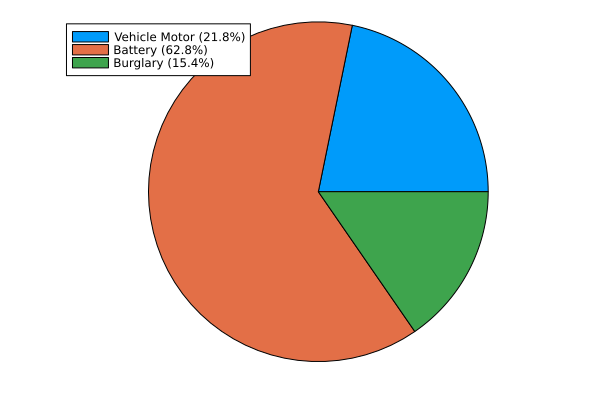

In [53]:
#Showing pie chart and percentages of Incident types classifying 3 different categories

total = sum(Inc_cat_cnt.count)
Inc_cat_cnt.Percent = round.(Inc_cat_cnt.count ./total .* 100,digits = 1)
labels = ["$(Inc_cat_cnt.Incident_Type[i]) ($(round(Inc_cat_cnt.Percent[i],digits = 1))%)" for i in 1:nrow(Inc_cat_cnt)]
# P = Plots.pie(x,y,l=1.5)
# P
PiePer = Plots.pie(labels,Inc_cat_cnt.count ,subplot_titles = "Incident Type with percentages"
)
#PiePer


In [24]:
using PlotlyJS, CSV, DataFrames

┌ Warning: It looks like the Kaleido process is not responding. 
│ The unresponsive process will be killed, but this means that you will not be able to save figures using `savefig`.
│ 
│ If you are on Windows this might be caused by known problems with Kaleido v0.2 on Windows (you are using version 0.2.1).
│ You might want to try forcing a downgrade of the Kaleido_jll library to 0.1.
│ Check the Package Readme at https://github.com/JuliaPlots/PlotlyKaleido.jl/tree/main#windows-note for more details.
│ 
│ If you think this is not your case, you might try using a longer timeout to check if the process is not responding (defaults to 10 seconds) by passing the desired value in seconds using the `timeout` kwarg when calling `PlotlyKaleido.start` or `PlotlyKaleido.restart`
└ @ PlotlyKaleido C:\Users\umapa\.julia\packages\PlotlyKaleido\U5CX4\src\PlotlyKaleido.jl:24


In [25]:
susp_weap_catN_cnt

Row,weap_categoryN,count
,String,Int64
1,Gun,53
2,Motor Vehicle,15
3,No arms,10


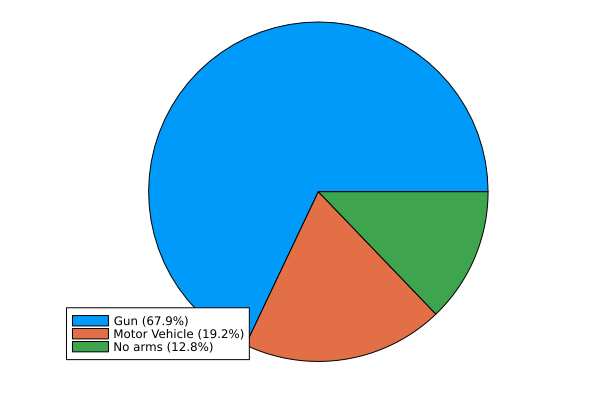

In [54]:
#Display bar chart showing frequency count of Suspects weapon categories
# df = dataset(DataFrame, "gapminder")
#plot_weap_percent =PlotlyJS.plot(susp_weap_catN_cnt, x=:weap_categoryN, y=:count, kind="bar")
#lot_weap_percent =Plots.plot(susp_weap_catN_cnt.weap_categoryN, susp_weap_catN_cnt.count, kind="bar")

# susp_weap_catN_cnt
# total = sum(Inc_cat_cnt.count)
# Inc_cat_cnt.Percent = round.(Inc_cat_cnt.count ./total .* 100,digits = 1)
# labels = ["$(Inc_cat_cnt.Incident_Type[i]) ($(round(Inc_cat_cnt.Percent[i],digits = 1))%)" for i in 1:nrow(Inc_cat_cnt)]
# PiePer = Plots.pie(labels,Inc_cat_cnt.count,title = "Incident Type with percentages")


weap_cat_total = sum(susp_weap_catN_cnt.count)
susp_weap_catN_cnt.Percent = round.(susp_weap_catN_cnt.count ./weap_cat_total .* 100,digits = 1)
Inc_weap_lbl = ["$(susp_weap_catN_cnt.weap_categoryN[i]) ($(round(susp_weap_catN_cnt.Percent[i],digits = 1))%)" for i in 1:nrow(susp_weap_catN_cnt)]
PiePer_weap_cat = Plots.pie(Inc_weap_lbl,susp_weap_catN_cnt.count,
subplot_titles = "Incident weap categories"
)
#PiePer_weap_cat



#Suscpect's weapon type Gun is major contributor and Motor vechicle is next highest contributor for Traffic violations.

In [27]:
Inc_type_cnt = combine(groupby(data,:"Incident Type"),nrow => :count)
sort(Inc_type_cnt,:count,rev=true)

Row,Incident Type,count
,String,Int64
1,Traffic Stop,7
2,Suspicious Person,6
3,Armed Robbery,5
4,Stolen Vehicle,4
5,Attempted Suicide,4
6,Armed Subject,4
7,Battery,3
8,Shots fired,3
9,Domestic Disturbance,2


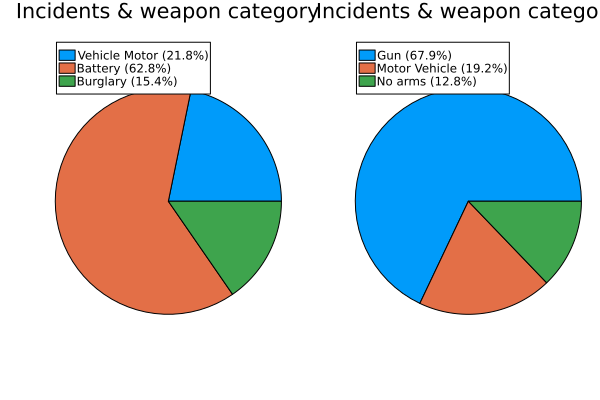

In [57]:
Plots.plot(PiePer,PiePer_weap_cat,title = "Incidents & weapon category")

